In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input
from tensorflow.keras.layers import Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

import tensorflow as tf

2023-06-06 21:52:05.441659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


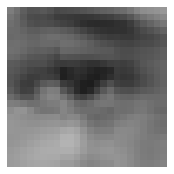

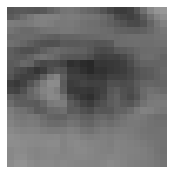

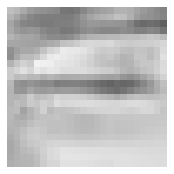

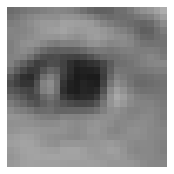

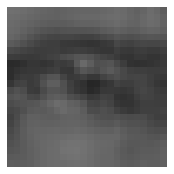

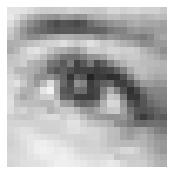

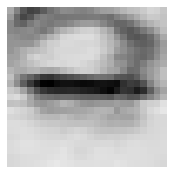

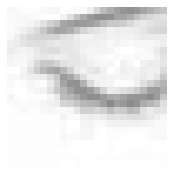

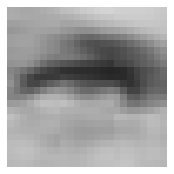

In [2]:
images = glob("train_dataset/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(10,10))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis("off")

In [3]:
closedLeftEyes = glob("train_dataset/closedLeftEyes/**")
openLeftEyes = glob("train_dataset/openLeftEyes/**")
closedRightEyes = glob("train_dataset/closedRightEyes/**")
openRightEyes = glob("train_dataset/openRightEyes/**")

In [4]:
open_eyes = []
closed_eyes = []

In [5]:
def append_open(eyes):
    
    for image in eyes:
        image = cv2.imread(image)
        if (image is not None):
            if image.shape == (24,24,3):
                open_eyes.append(image)

In [6]:
append_open(openLeftEyes)
append_open(openRightEyes)

In [7]:
def append_closed(eyes):
    for image in eyes:
        image = cv2.imread(image)
        if (image is not None):
            if image.shape == (24,24,3):
                closed_eyes.append(image)

In [8]:
append_closed(closedLeftEyes)
append_closed(closedRightEyes)

In [9]:
print(len(open_eyes))
print(len(closed_eyes))

2462
2384


In [10]:
open_labels = [ 1 for i in range(len(open_eyes)) ]
closed_labels = [ 0 for i in range(len(closed_eyes)) ]

In [11]:
print(len(open_labels))
print(len(closed_labels))

2462
2384


In [12]:
dataset = open_eyes + closed_eyes
x = np.array(dataset)
x.shape

(4846, 24, 24, 3)

In [13]:
label_dataset = open_labels+closed_labels
y = np.array(label_dataset)
y.shape

(4846,)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3392, 24, 24, 3)
(1454, 24, 24, 3)
(3392,)
(1454,)


In [16]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    
    return x

In [17]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = Activation('relu')(x)
    
    return x

In [18]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,24,(3,3))
    conv_2 = Convolution(conv_1,48,(3,3))

    flatten = Flatten()(conv_2)
    
    dense_1 = Dense_f(flatten,48)

    output  = Dense(1, activation="sigmoid")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])

    return model



In [19]:
model = model_fer((24,24,3))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 24, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 24)        672       
                                                                 
 activation (Activation)     (None, 24, 24, 24)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 48)        10416     
                                                                 
 activation_1 (Activation)   (None, 12, 12, 48)        0         
                                                             

2023-06-06 21:52:12.253639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.compile(loss=['binary_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

In [21]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
  7/106 [>.............................] - ETA: 2s - loss: 18.4697 - accuracy: 0.5759

2023-06-06 21:52:13.512329: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20279808 exceeds 10% of free system memory.
2023-06-06 21:52:13.512601: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20279808 exceeds 10% of free system memory.
2023-06-06 21:52:13.546901: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 16298496 exceeds 10% of free system memory.
2023-06-06 21:52:13.568936: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20279808 exceeds 10% of free system memory.
2023-06-06 21:52:13.569039: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20279808 exceeds 10% of free system memory.


106/106 [==============================] - 3s 18ms/step - loss: 2.1280 - accuracy: 0.7255
Epoch 2/20
106/106 [==============================] - 2s 17ms/step - loss: 0.2599 - accuracy: 0.8983
Epoch 3/20
106/106 [==============================] - 2s 16ms/step - loss: 0.1881 - accuracy: 0.9290
Epoch 4/20
106/106 [==============================] - 2s 16ms/step - loss: 0.1362 - accuracy: 0.9475
Epoch 5/20
106/106 [==============================] - 2s 16ms/step - loss: 0.1259 - accuracy: 0.9508
Epoch 6/20
106/106 [==============================] - 2s 15ms/step - loss: 0.1046 - accuracy: 0.9634
Epoch 7/20
106/106 [==============================] - 2s 17ms/step - loss: 0.1000 - accuracy: 0.9608
Epoch 8/20
106/106 [==============================] - 2s 16ms/step - loss: 0.1134 - accuracy: 0.9573
Epoch 9/20
106/106 [==============================] - 2s 15ms/step - loss: 0.0847 - accuracy: 0.9679
Epoch 10/20
106/106 [==============================] - 2s 16ms/step - loss: 0.0947 - accuracy: 0.9652


In [22]:
model.evaluate(x_test,y_test)

46/46 [==============================] - 1s 8ms/step - loss: 0.1654 - accuracy: 0.9457


[0.16539724171161652, 0.9456671476364136]

In [26]:
y_test[0]

1

In [24]:
model.predict(x_train)

106/106 [==============================] - 1s 7ms/step


array([[7.1782804e-01],
       [9.7419405e-01],
       [4.0174794e-04],
       ...,
       [9.9982399e-01],
       [2.1824087e-01],
       [5.1316899e-01]], dtype=float32)

In [25]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")